In [198]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as nb
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [200]:
# Load the dataset into a dataframe
data = pd.read_csv(r"C:\Users\X\Desktop\Financial Dataset.csv")

In [202]:
# Display the first rows of the dataframe
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [204]:
# Display summary statistics of the dataset
data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [206]:
# Display information about the dataset, including column types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


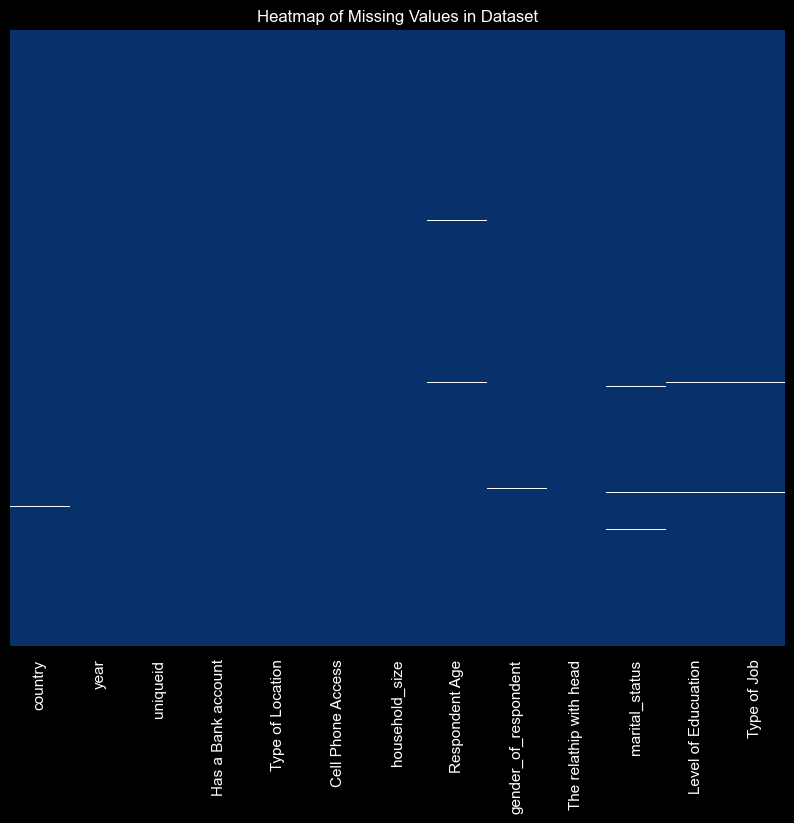

,Column,Missing Values,Percentage Missing
0,country,14,0.059514
1,year,0,0.000000
2,uniqueid,0,0.000000
3,Has a Bank account,36,0.153035
4,Type of Location,15,0.063765
5,Cell Phone Access,11,0.046761
6,household_size,28,0.119027
7,Respondent Age,34,0.144533
8,gender_of_respondent,34,0.144533
9,The relathip with head,4,0.017004


In [208]:
# Set the dark background and style as specified by the user's preferences
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Step 1: Missing Data Analysis
# Visualize missing data using a heatmap to see where the data is missing
plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False, cmap="Blues_r", yticklabels=False)
plt.title("Heatmap of Missing Values in Dataset")
plt.show()

# Descriptive stats on missing values by column
missing_data_stats = data.isnull().sum().reset_index()
missing_data_stats.columns = ['Column', 'Missing Values']
missing_data_stats['Percentage Missing'] = (missing_data_stats['Missing Values'] / len(data)) * 100

# Display the missing data summary
missing_data_stats


In [258]:
# Filling missing values 
# Categorical columns: Fill with the mode
categorical_cols = ['country', 'Has a Bank account', 'Type of Location', 
                    'Cell Phone Access', 'gender_of_respondent', 
                    'The relathip with head', 'marital_status', 
                    'Level of Educuation', 'Type of Job']
for col in categorical_cols:
    # Assign the result of fillna() directly to the column
    data[col] = data[col].fillna(data[col].mode()[0])

# Numeric columns: Fill with the median
numeric_cols = ['household_size', 'Respondent Age']
for col in numeric_cols:
    # Assign the result of fillna() directly to the column
    data[col] = data[col].fillna(data[col].median())

# Verifying that no missing values remain
missing_data_after_fill = data.isnull().sum().sum()
missing_data_after_fill

0

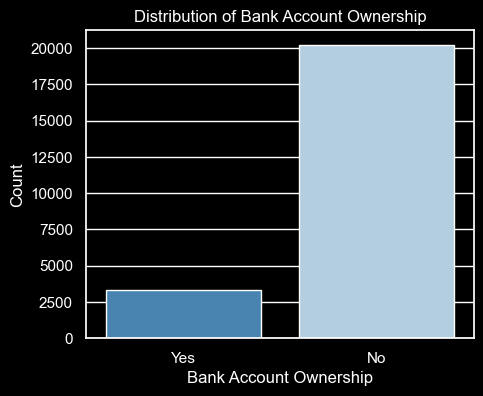

In [214]:
# Step 2: Distribution of Key Variables

# 1. Distribution of Bank Account Ownership
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Has a Bank account', hue='Has a Bank account', palette="Blues_r", order=['Yes', 'No'], legend=False)
plt.title("Distribution of Bank Account Ownership")
plt.xlabel("Bank Account Ownership")
plt.ylabel("Count")
plt.show()

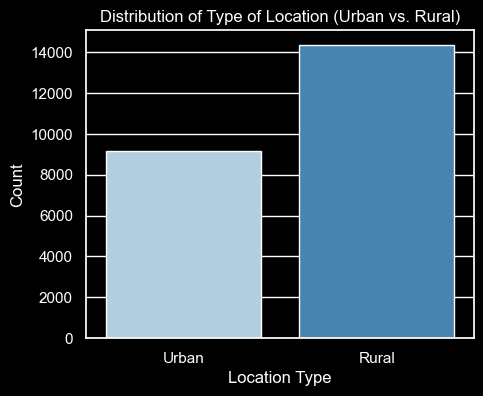

In [216]:
# 2. Distribution of Type of Location (Urban vs. Rural)
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Type of Location', hue='Type of Location', palette="Blues_r", order=['Urban', 'Rural'], legend=False)
plt.title("Distribution of Type of Location (Urban vs. Rural)")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.show()

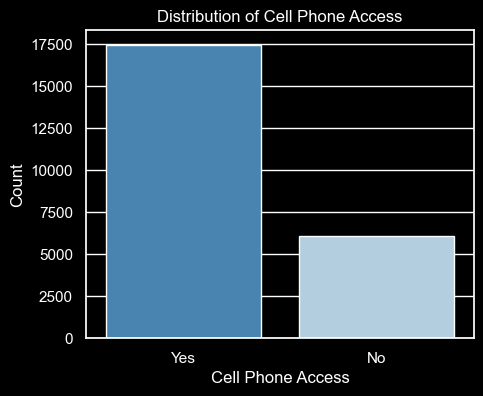

In [218]:
# 3. Distribution of Cell Phone Access
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Cell Phone Access', hue='Cell Phone Access', palette="Blues_r", order=['Yes', 'No'], legend=False)
plt.title("Distribution of Cell Phone Access")
plt.xlabel("Cell Phone Access")
plt.ylabel("Count")
plt.show()

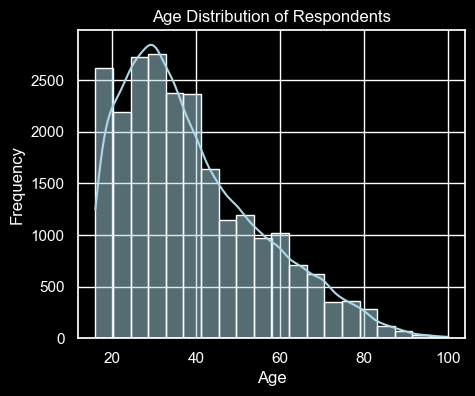

In [220]:
# Step 3: Univariate Analysis

# 1. Age Distribution
plt.figure(figsize=(5, 4))
sns.histplot(data['Respondent Age'], kde=True, color="lightblue", bins=20)
plt.title("Age Distribution of Respondents")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

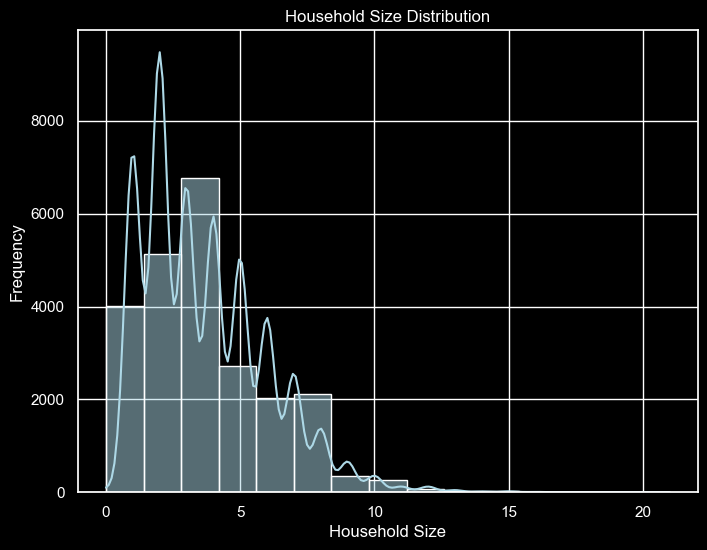

In [254]:
# 2. Household Size Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['household_size'], kde=True, color="lightblue", bins=15)
plt.title("Household Size Distribution")
plt.xlabel("Household Size")
plt.ylabel("Frequency")
plt.show()

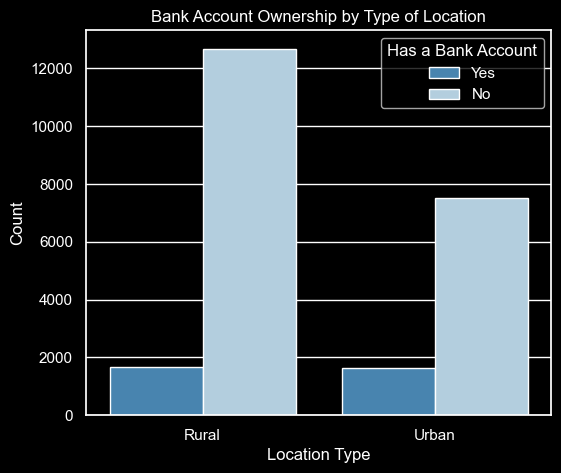

In [224]:
# Step 4: Bivariate Analysis

# 1. Bank Account Ownership vs. Type of Location (Rural/Urban)
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='Type of Location', hue='Has a Bank account', palette="Blues_r")
plt.title("Bank Account Ownership by Type of Location")
plt.xlabel("Location Type")
plt.ylabel("Count")
plt.legend(title="Has a Bank Account")
plt.show()

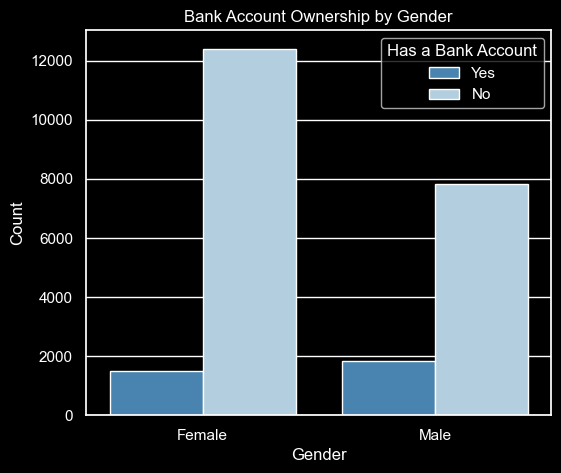

In [226]:
# 2. Bank Account Ownership vs. Gender
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='gender_of_respondent', hue='Has a Bank account', palette="Blues_r")
plt.title("Bank Account Ownership by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Has a Bank Account")
plt.show()


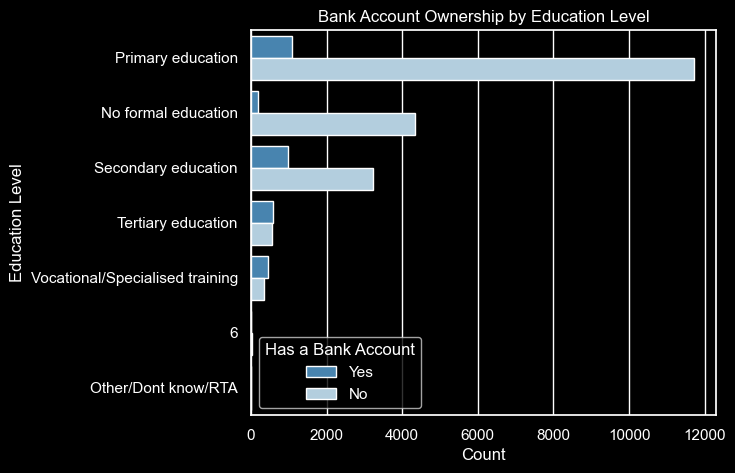

In [228]:
# 3. Bank Account Ownership vs. Education Level
plt.figure(figsize=(6, 5))
sns.countplot(data=data, y='Level of Educuation', hue='Has a Bank account', palette="Blues_r",
              order=data['Level of Educuation'].value_counts().index)
plt.title("Bank Account Ownership by Education Level")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title="Has a Bank Account")
plt.show()

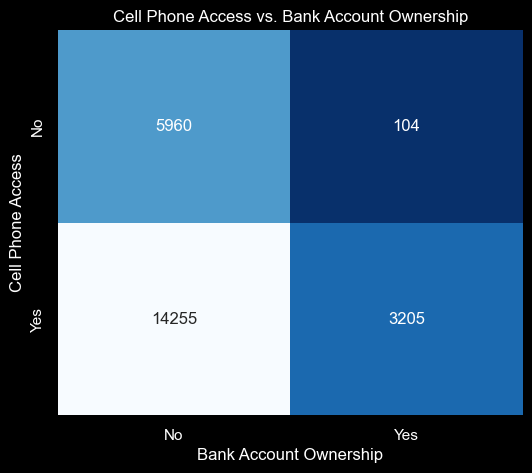

In [230]:
# 4. Cell Phone Access vs. Bank Account Ownership
# Create a cross-tabulation and heatmap to see correlation
cell_bank_crosstab = pd.crosstab(data['Cell Phone Access'], data['Has a Bank account'])
plt.figure(figsize=(6, 5))
sns.heatmap(cell_bank_crosstab, annot=True, cmap="Blues_r", fmt="d", cbar=False)
plt.title("Cell Phone Access vs. Bank Account Ownership")
plt.xlabel("Bank Account Ownership")
plt.ylabel("Cell Phone Access")
plt.show()

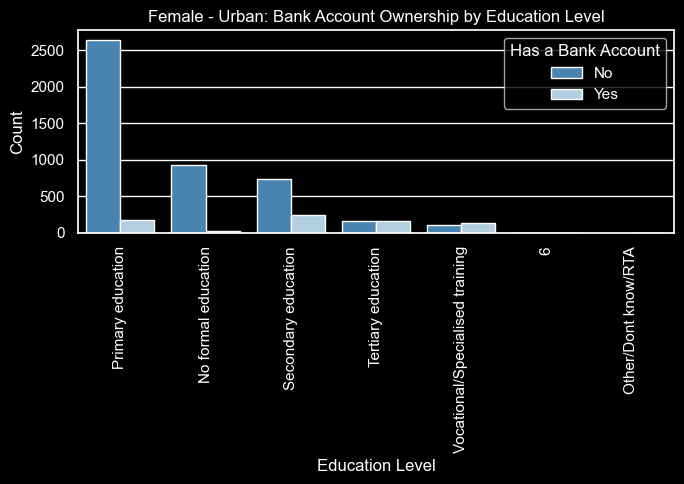

In [232]:
# Step 5: Multivariate Analysis

# Creating individual visualizations for each combination of gender and location, one by one

# Female - Urban
plt.figure(figsize=(7, 5))
sns.countplot(data=data[(data['gender_of_respondent'] == 'Female') & 
                                  (data['Type of Location'] == 'Urban')], 
              x='Level of Educuation', hue='Has a Bank account', palette="Blues_r", 
              order=data['Level of Educuation'].value_counts().index)
plt.title("Female - Urban: Bank Account Ownership by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Has a Bank Account")
plt.tight_layout()
plt.show()




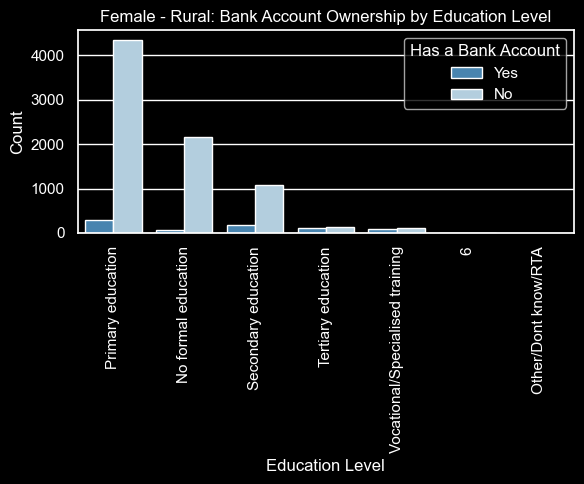

In [238]:
# Female - Rural
plt.figure(figsize=(6, 5))
sns.countplot(data=data[(data['gender_of_respondent'] == 'Female') & 
                                  (data['Type of Location'] == 'Rural')], 
              x='Level of Educuation', hue='Has a Bank account', palette="Blues_r", 
              order=data['Level of Educuation'].value_counts().index)
plt.title("Female - Rural: Bank Account Ownership by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Has a Bank Account")
plt.tight_layout()
plt.show()



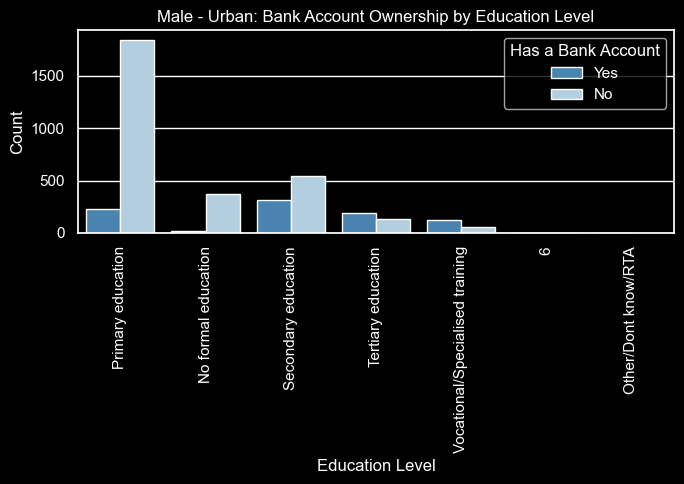

In [240]:
# Male - Urban
plt.figure(figsize=(7, 5))
sns.countplot(data=data[(data['gender_of_respondent'] == 'Male') & 
                                  (data['Type of Location'] == 'Urban')], 
              x='Level of Educuation', hue='Has a Bank account', palette="Blues_r", 
              order=data['Level of Educuation'].value_counts().index)
plt.title("Male - Urban: Bank Account Ownership by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Has a Bank Account")
plt.tight_layout()
plt.show()



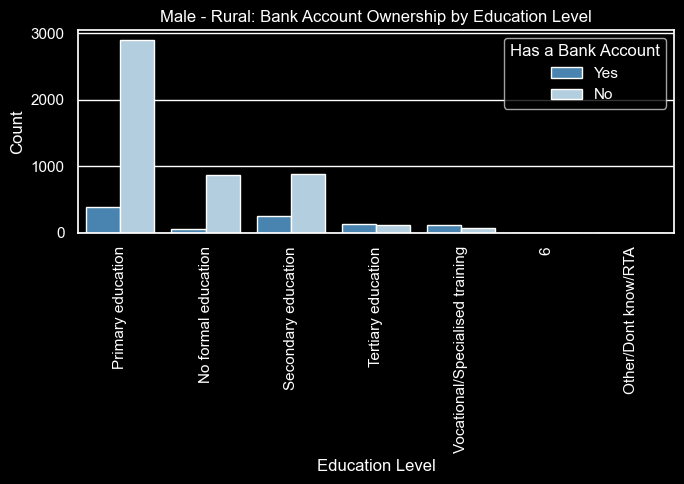

In [244]:
# Male - Rural
plt.figure(figsize=(7, 5))
sns.countplot(data=data[(data['gender_of_respondent'] == 'Male') & 
                                  (data['Type of Location'] == 'Rural')], 
              x='Level of Educuation', hue='Has a Bank account', palette="Blues_r", 
              order=data['Level of Educuation'].value_counts().index)
plt.title("Male - Rural: Bank Account Ownership by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Has a Bank Account")
plt.tight_layout()
plt.show()

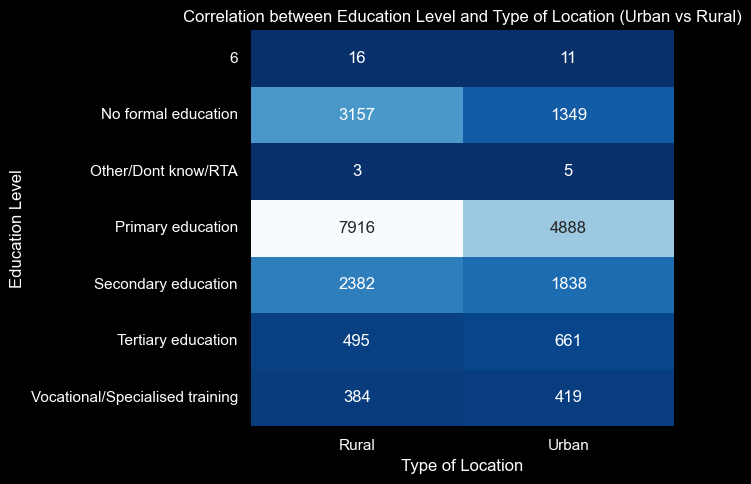

In [256]:
# Step 6: Correletion Analysis

# Analyzing the correlation between education level and location

# Cross-tabulation of Education Level vs. Location
education_location_crosstab = pd.crosstab(data['Level of Educuation'], data['Type of Location'])

# Visualizing the cross-tabulation using a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(education_location_crosstab, annot=True, cmap="Blues_r", fmt="d", cbar=False)
plt.title("Correlation between Education Level and Type of Location (Urban vs Rural)")
plt.xlabel("Type of Location")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()
